In [168]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [122]:
df = pd.read_csv('heart.csv')

In [74]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [75]:
df.shape

(918, 12)

In [76]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


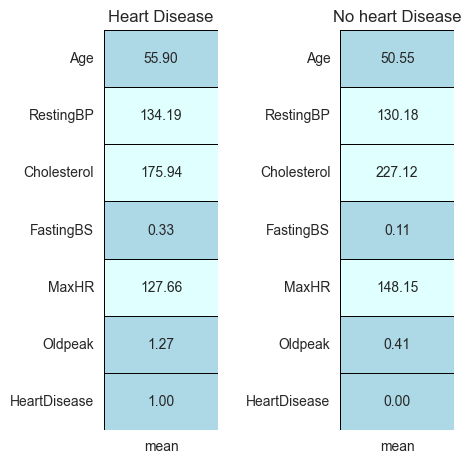

In [78]:
yes= df[df['HeartDisease'] == 1]. describe().T
no= df[df['HeartDisease']==0].describe().T
color= ['#ADD8E6','#E0FFFF']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))



plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],cmap= color, annot= True, cbar= False, linecolor= 'black', linewidths= 0.4, fmt= '.2f')
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(no[['mean', ]], annot= True,cmap= color, linewidth= 0.4, linecolor= 'black', fmt= '.2f', cbar= False)
plt.title('No heart Disease')
fig.tight_layout(pad = 2)

Text(0.5, 1.0, 'Heart Disease %')

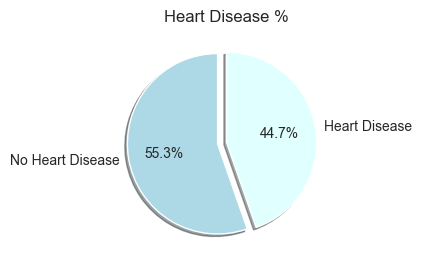

In [79]:
partition = list(df['HeartDisease'].value_counts())
plt.subplot(1,2,1)
plt.pie(partition,
        labels = ['No Heart Disease','Heart Disease'],
        autopct='%1.1f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = color,
        shadow= True,
       )
plt.title('Heart Disease %')

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#import plotly.express as px
#import plotly.figure_factory as ff

theme_colors = ['#F9B1B8',  '#EE4355',  '#B60618','#820815']

color_palette = ['#FFFFFF', '#F9B1B8', '#EE4355', '#B60618', '#820815', '#000000']

font = 'Courier New'

In [81]:
sex_count = df.groupby(['Sex']).size().reset_index().rename(columns={0: 'count'})
cp_count = df.groupby(['ChestPainType']).size().reset_index().rename(columns={0: 'count'})
fasting_bs_count = df.groupby(['FastingBS']).size().reset_index().rename(columns={0: 'count'})
resting_ecg_count = df.groupby(['RestingECG']).size().reset_index().rename(columns={0: 'count'})
angina_count = df.groupby(['ExerciseAngina']).size().reset_index().rename(columns={0: 'count'})
st_slope_count = df.groupby(['ST_Slope']).size().reset_index().rename(columns={0: 'count'})

fig = make_subplots(rows=3, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]
                          ])


## Sex Donut Chart
fig.add_trace(
    go.Pie(
        labels=sex_count['Sex'],
        values=sex_count['count'],
        hole=.6,
        title='Sex',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=1
    )

## Chest Pain Type Donut Chart
fig.add_trace(
    go.Pie(
        labels=cp_count['ChestPainType'],
        values=cp_count['count'],
        hole=.6,
        title='Chest Pain Type',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=2
    )

## Fasting Blood Sugar Donut Chart
fig.add_trace(
    go.Pie(
        labels=fasting_bs_count['FastingBS'],
        values=fasting_bs_count['count'],
        hole=.6,
        title='Fasting Blood Sugar',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=1
    )


## RestingECG Donut Chart
fig.add_trace(
    go.Pie(
        labels=resting_ecg_count['RestingECG'],
        values=resting_ecg_count['count'],
        hole=.6,
        title='Resting ECG',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=2
    )

## ExerciseAngina Donut Chart
fig.add_trace(
    go.Pie(
        labels=angina_count['ExerciseAngina'],
        values=angina_count['count'],
        hole=.6,
        title='Exercise Angina',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=1
    )

## ST_Slope Donut Chart
fig.add_trace(
    go.Pie(
        labels=st_slope_count['ST_Slope'],
        values=st_slope_count['count'],
        hole=.6,
        title='ST Slope',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=2
    )

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=theme_colors,
        line=dict(color='#EEEEEE',
                  width=2)
        )
    )


fig.layout.update(title="<b> Categorical Features Donut Charts <b>",
                  titlefont={'color':None, 'size': 24, 'family': 'Courier New'},
                  showlegend=False,
                  height=1000,
                  width=1000,
#                   paper_bgcolor="#333333",
                  template='plotly_dark',
                  title_x=0.5
                  )
fig.show()

In [82]:
fig=make_subplots(rows=2,cols=2,subplot_titles=('<i>Age', '<i>Resting BP', '<i>Cholesterol', '<i>MaxHR'))
fig.add_trace(go.Histogram(x=df['Age'],name='Age'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['RestingBP'],name='RestingBP'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['Cholesterol'],name='Cholesterol'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['MaxHR'],name='MaxHR'),row=2,col=2)

fig.update_layout(height=600, width=1000, title_text='<b>Feature Distribution', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New')

Dealing with categorical features

In [123]:
#categorical columns are sex, chestpaintype, restingecg, exerciseengina, stslope
print('Sex values: ',df.Sex.unique())
print('Chest Pain Type: ',df.ChestPainType.unique())
print('Resting Ecg: ',df.RestingECG.unique())
print('Exercise Angina',df.ExerciseAngina.unique())
print('ST Slope: ',df.ST_Slope.unique())

Sex values:  ['M' 'F']
Chest Pain Type:  ['ATA' 'NAP' 'ASY' 'TA']
Resting Ecg:  ['Normal' 'ST' 'LVH']
Exercise Angina ['N' 'Y']
ST Slope:  ['Up' 'Flat' 'Down']


In [124]:
df.Sex = df.Sex.map({'M':1,'F':0})
df.ExerciseAngina = df.ExerciseAngina.map({'N':0,'Y':1})

#for multiclass using onehotencoder technique

df = pd.get_dummies(df,columns=['ChestPainType','RestingECG','ST_Slope'],drop_first=True)


In [125]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


Standardize the dataset
using robust scalar to standardize the data

In [154]:
#taking care the numerical features dispersion in data
#numerical featuress are -> MaxHR,Cholesterol, RestingBP, Age
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
rb = StandardScaler()

df[['Age','RestingBP','Cholesterol','MaxHR']] = rb.fit_transform(df[['Age','RestingBP','Cholesterol','MaxHR']])

In [155]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,0.0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,1.0,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,0.0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,1.5,1,0,0,0,1,0,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,0.0,0,0,1,0,1,0,0,1


Extracting samples from dataset

In [156]:
X = df.drop('HeartDisease',axis=1).values
Y = df['HeartDisease'].values
print('shape of the X: ',X.shape)
print('shape of the Y: ',Y.shape)

shape of the X:  (918, 15)
shape of the Y:  (918,)


Splitting the data set in test and train

In [157]:

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [172]:
#validating the classifiers on the dataset
kf = KFold(n_splits=10)
lr = LogisticRegression()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgd = SGDClassifier()

result_lr = cross_val_score(lr,X_train,y_train,cv=kf)
result_rfc = cross_val_score(rfc,X_train,y_train,cv=kf)
result_knn = cross_val_score(knn,X_train,y_train,cv=kf)
result_sgd = cross_val_score(sgd,X_train,y_train,cv=kf)
print('Accuracy by Logistic Regression: ',result_lr.mean())
print('Accuracy by Random Forest Classifier: ',result_rfc.mean())
print('Accuracy by KNearest Neighbours: ',result_knn.mean())
print('Accuracy by SGD Classifier: ',result_sgd.mean())

Accuracy by Logistic Regression:  0.8582211538461539
Accuracy by Random Forest Classifier:  0.8535817307692308
Accuracy by KNearest Neighbours:  0.859735576923077
Accuracy by SGD Classifier:  0.7988461538461539


In [174]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
#y_pred vs y_test
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred).T)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[ 89  30]
 [ 23 134]]
Accuracy Score:  0.8079710144927537
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       112
           1       0.85      0.82      0.83       164

    accuracy                           0.81       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.81      0.81       276



Text(0, 0.5, 'Error Rate')

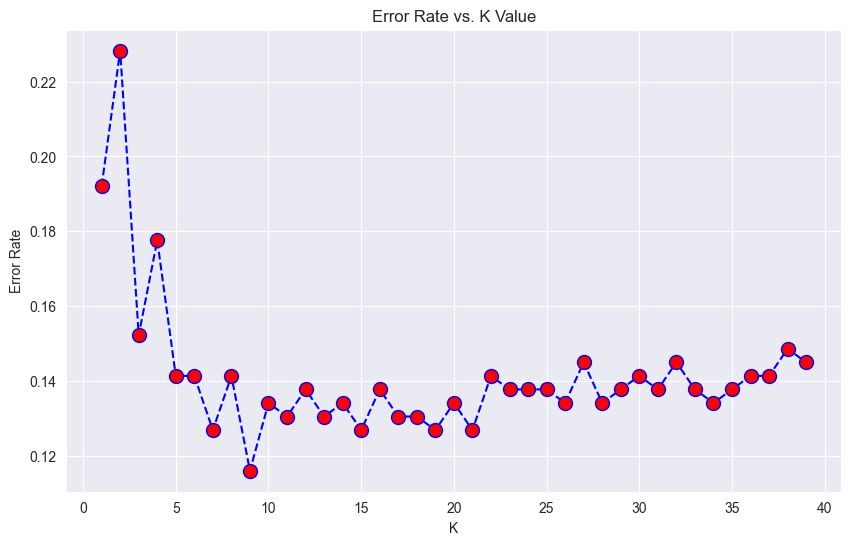

In [178]:
error_rate = []

for i in range(1,40):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train,y_train)
    pred_i = KNN_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [177]:

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
#y_pred vs y_test
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred).T)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[ 97  22]
 [ 15 142]]
Accuracy Score:  0.8659420289855072
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.90      0.87      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



Accuracy is improved on KNN model
Creating Confusion Matrix

In [183]:
conmat = confusion_matrix(y_test, y_pred)
val = np.mat(conmat)
classnames = list(set(y_test))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames )

print('Confusion Matrix')
print(df_cm)

Confusion Matrix
    0    1
0  97   15
1  22  142


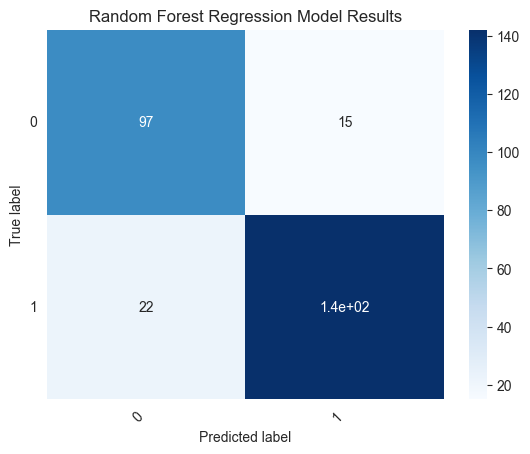

In [184]:

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Random Forest Regression Model Results')

plt.show()